# 逻辑斯蒂回归（30）

##### 简介
本作业需要你实现逻辑斯蒂回归中的`梯度下降`算法。 算法的目标是迭代地更新 `self.weights` 和 `self.bias` 以优化模型。在实现该算法并训练后，你将会看到决策边界的可视化结果。
+ 随机生成100个数据点，包括两个特征 `x` 和 `y`。其中$x+y>0$的数据点的类别为1，$x+y<0$的数据点的类别为0。
+ 但是假设你并不知道这些数据点的分类标准，你需要通过逻辑斯蒂回归算法找到一个能够正确分类这些数据点的决策边界。
+ 需要你实现逻辑斯蒂回归的梯度下降算法，以根据生成的100个数据点找到一个能够正确分类这些数据点的决策边界。
##### 任务
在下面的代码中改动 `LogisticRegression` 类中的 `gradient_descent` 函数。该函数中的一些代码已经被提供，你需要实现剩余的部分，不需要改动任何其他部分的代码。
##### 提示
1. **正向传播:** 通过 `self.weights` 和 `self.bias` 计算预测值 `fx`。 (5)
2. **反向传播:** 计算 `self.weights` 和 `self.bias` 的梯度(`dw`) 和 (`db`)。(20)
3. **更新参数:** 使用计算得到的梯度和学习率更新 `self.weights` 和 `self.bias`。(5)
4. **记录loss:** 代码应在每100次迭代后输出loss。在 `gradient_descent` 函数中, 我们实现了cost：`cost = -1/m * np.sum(y * np.log(fx) + (1 - y) * np.log(1 - fx))`, 但是预测值`fx` 需要通过你实现的逻辑斯蒂回归计算得到，不需要改动`cost`的计算代码。
##### **注意:** 不要改动其他部分的代码，仅仅修改 `gradient_descent` 方法。
##### 评估
最后一个单元格已经给出了正确实现下代码的输出结果。
##### **注意:** 由于随机数种子固定，正确的算法每次运行应有同样的输出，最终的输出应为：
+ Cost after iteration 0: 0.6931471805599453
+ Cost after iteration 100: 0.5645086371916975
+ Cost after iteration 200: 0.4839791161873482
+ Cost after iteration 300: 0.42955395690531123
+ Cost after iteration 400: 0.39016248007801013
+ Cost after iteration 500: 0.36011499731989555
+ Cost after iteration 600: 0.33627358654228795
+ Cost after iteration 700: 0.3167799857568714
+ Cost after iteration 800: 0.3004643426745476
+ Cost after iteration 900: 0.28655195133876926
+ Accuracy: 0.98

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, num_features):
        self.weights = np.zeros((num_features))
        self.bias = 0

    def gradient_descent(self, X, y):
        m, n = X.shape
        self.initialize_parameters(n)

        for i in range(self.num_iterations):
            # 在这里完成你的代码。
            # 正向传播(sigmoid函数已经提供)
            fx = self.sigmoid(X @ self.weights + self.bias)
            # 计算cost
            cost = -1/m * np.sum(y * np.log(fx) + (1 - y) * np.log(1 - fx))
            # 计算梯度
            dw = 1 / m * np.dot(X.T, (fx - y))
            db = 1 / m * np.sum (fx - y)
            # 更新参数
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            # Print the cost every 100 iterations
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        fx = self.sigmoid(z)
        predictions = (fx > 0.5).astype(int)
        return predictions

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5645086371916975
Cost after iteration 200: 0.4839791161873482
Cost after iteration 300: 0.42955395690531123
Cost after iteration 400: 0.39016248007801013
Cost after iteration 500: 0.36011499731989555
Cost after iteration 600: 0.33627358654228795
Cost after iteration 700: 0.3167799857568714
Cost after iteration 800: 0.3004643426745476
Cost after iteration 900: 0.28655195133876926
Accuracy: 0.98


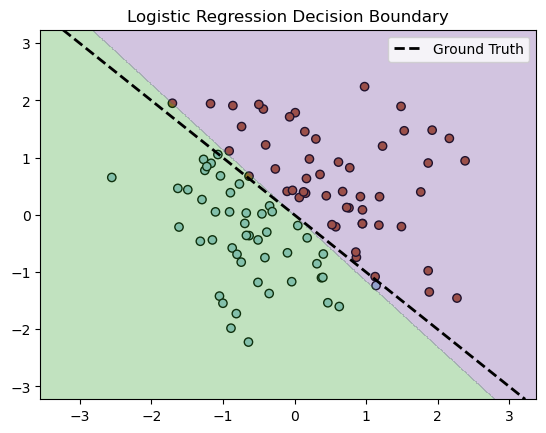

In [4]:
# 生成样例数据
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# 初始化并训练模型
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.gradient_descent(X, y)

# 计算准确率
predictions = model.predict(X)
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy}")

# 展示数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

# 计算决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 展示计算得到的的决策边界
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3, levels=[0, 0.5, 1])

# 展示真实的决策边界 (ground truth)
actualZ = (xx + yy > 0).astype(int).reshape(xx.shape)
plt.contour(xx, yy, actualZ, alpha=1, linewidths=2, levels=[0.5], colors='k', linestyles='dashed')
custom_lines = [Line2D([0], [0], color='k', linestyle='dashed', linewidth=2, label='Ground Truth')]

plt.legend(handles=custom_lines)
plt.title('Logistic Regression Decision Boundary')
plt.show()